# :two_hearts: 4 - Evaluation

## Imports

In [117]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve,
    f1_score
)

## Predefined variables

In [118]:
CSV_SPLITS_DIR = "../data/splits/"
MODELS_DIR = "../models/"
MEDIA_DIR_PATH = "../media/"

PALETTE = "flare"

## Load test set

In [119]:
X_test = pd.read_csv(f"{CSV_SPLITS_DIR}X_test.csv")
y_test = pd.read_csv(f"{CSV_SPLITS_DIR}y_test.csv").values.ravel()

## Load models & model info

In [120]:
overview = pd.read_csv("../results/model_overview.csv")
overview

,model,feature_subset,best_cv,cv_roc_auc,best_params,model_path
0,XGBoost,all,10,0.929082,"{'classifier__learning_rate': 0.03, 'classifie...",../models/XGBoost_all_cv10.joblib
1,RandomForest,all,10,0.927438,"{'classifier__max_depth': None, 'classifier__m...",../models/RandomForest_all_cv10.joblib
2,XGBoost,FS-3,10,0.917774,"{'classifier__learning_rate': 0.03, 'classifie...",../models/XGBoost_FS-3_cv10.joblib
3,RandomForest,FS-1,5,0.916203,"{'classifier__max_depth': 10, 'classifier__min...",../models/RandomForest_FS-1_cv5.joblib
4,XGBoost,FS-1,10,0.915968,"{'classifier__learning_rate': 0.03, 'classifie...",../models/XGBoost_FS-1_cv10.joblib
5,RandomForest,FS-3,5,0.913712,"{'classifier__max_depth': 5, 'classifier__min_...",../models/RandomForest_FS-3_cv5.joblib
6,XGBoost,FS-2,10,0.913466,"{'classifier__learning_rate': 0.03, 'classifie...",../models/XGBoost_FS-2_cv10.joblib
7,RandomForest,FS-2,10,0.912880,"{'classifier__max_depth': None, 'classifier__m...",../models/RandomForest_FS-2_cv10.joblib
8,XGBoost,categorical,10,0.909979,"{'classifier__learning_rate': 0.03, 'classifie...",../models/XGBoost_categorical_cv10.joblib
9,RandomForest,categorical,10,0.909072,"{'classifier__max_depth': 5, 'classifier__min_...",../models/RandomForest_categorical_cv10.joblib


In [121]:
models = {}

for _, row in overview.iterrows():
    model_path = row['model_path']
    models[model_path] = joblib.load(model_path)

## Evaluation metrics calculation

In [122]:
eval_results = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    eval_results.append({
        "model": model_name.split("/")[-1],
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "f1_score": f1_score(y_test, y_pred)
    })

eval_df = pd.DataFrame(eval_results)
eval_df = eval_df.sort_values("roc_auc", ascending=False)
eval_df

,model,accuracy,roc_auc,f1_score
1,RandomForest_all_cv10.joblib,0.886957,0.937619,0.899225
0,XGBoost_all_cv10.joblib,0.891304,0.937161,0.901961
9,RandomForest_categorical_cv10.joblib,0.860870,0.923744,0.874016
2,XGBoost_FS-3_cv10.joblib,0.869565,0.921948,0.880952
8,XGBoost_categorical_cv10.joblib,0.860870,0.921222,0.875000
5,RandomForest_FS-3_cv5.joblib,0.860870,0.920725,0.874016
4,XGBoost_FS-1_cv10.joblib,0.852174,0.913386,0.865079
6,XGBoost_FS-2_cv10.joblib,0.852174,0.913309,0.865079
3,RandomForest_FS-1_cv5.joblib,0.821739,0.906850,0.837945
7,RandomForest_FS-2_cv10.joblib,0.817391,0.906506,0.832000


## ROC curves

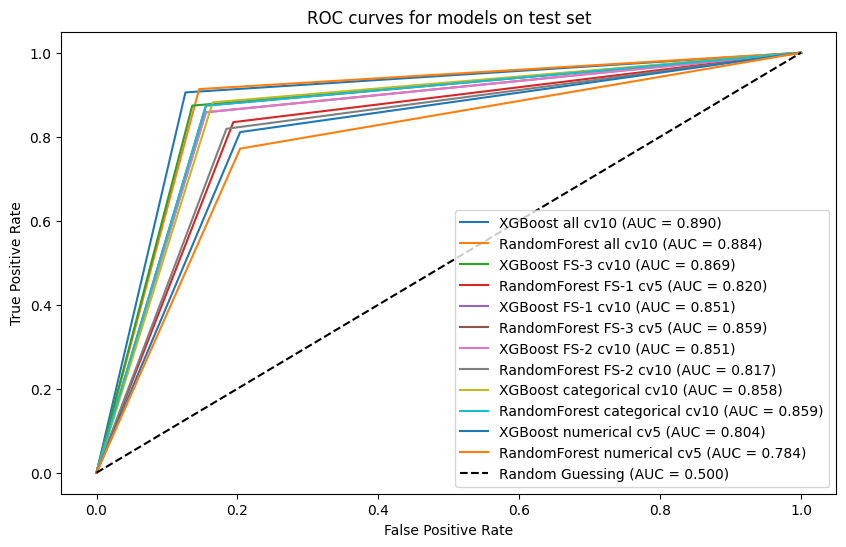

In [123]:
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    y_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{model_name.split('/')[-1].split('.')[0].replace('_', ' ')} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for models on test set')
plt.legend()
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    y_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{model_name.split('/')[-1].split('.')[0].replace('_', ' ')} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for models on test set')
plt.legend()
plt.savefig(f"{MEDIA_DIR_PATH}04-roc_curves_all.png")
plt.close()

### ROC curves for top 3 models

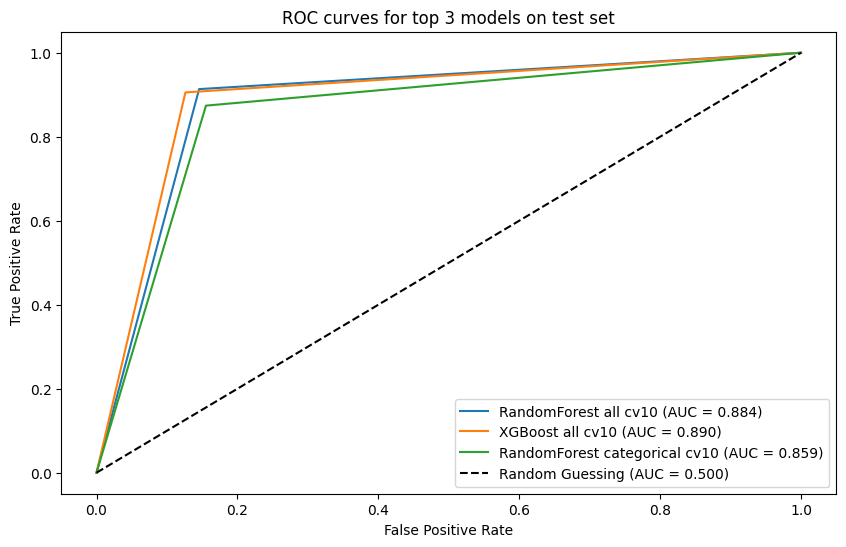

In [124]:
top3_models = eval_df.sort_values("roc_auc", ascending=False).head(3)["model"].values

plt.figure(figsize=(10, 6))

for model_name in top3_models:
    model = models[f"{MODELS_DIR}{model_name}"]
    y_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{model_name.split('.')[0].replace('_', ' ')} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for top 3 models on test set')
plt.legend()
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(10, 6))

for model_name in top3_models:
    model = models[f"{MODELS_DIR}{model_name}"]
    y_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{model_name.split('.')[0].replace('_', ' ')} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for top 3 models on test set')
plt.legend()
plt.savefig(f"{MEDIA_DIR_PATH}04-roc_curves_top3.png")
plt.close()

### ROC-curve for best model

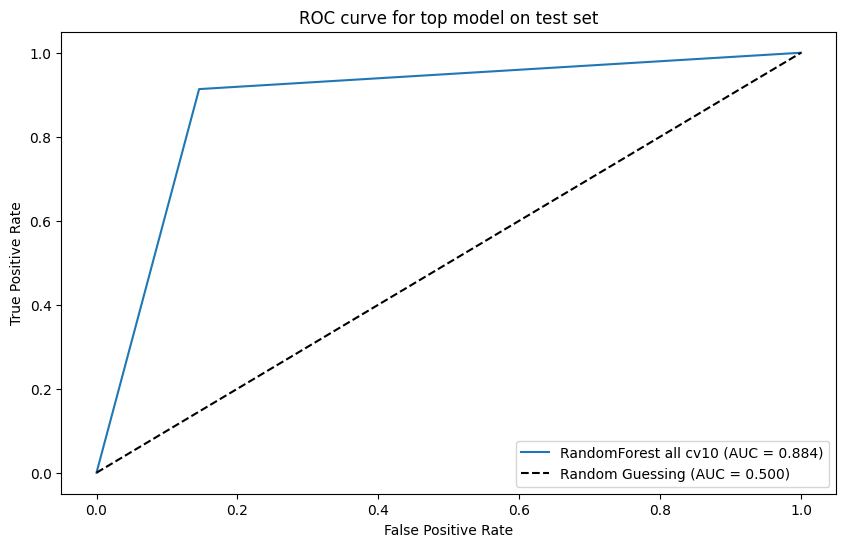

In [125]:
top_model = eval_df.sort_values("roc_auc", ascending=False).head(1)["model"].values

plt.figure(figsize=(10, 6))

for model_name in top_model:
    model = models[f"{MODELS_DIR}{model_name}"]
    y_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{model_name.split('.')[0].replace('_', ' ')} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for top model on test set')
plt.legend()
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(10, 6))

for model_name in top_model:
    model = models[f"{MODELS_DIR}{model_name}"]
    y_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{model_name.split('.')[0].replace('_', ' ')} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for top model on test set')
plt.legend()
plt.savefig(f"{MEDIA_DIR_PATH}04-roc_curve_best.png")
plt.close()

## Confusion matrix of best model

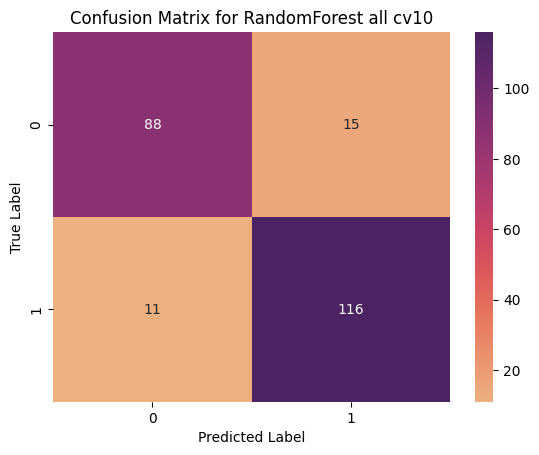

In [126]:
for model_name in top_model:
    model = models[f"{MODELS_DIR}{model_name}"]
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap=PALETTE)
    plt.title(f'Confusion Matrix for {model_name.split('.')[0].replace('_', ' ')}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Save this figure in MEDIA_DIR_PATH
for model_name in top_model:
    model = models[f"{MODELS_DIR}{model_name}"]
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap=PALETTE)
    plt.title(f'Confusion Matrix for {model_name.split('.')[0].replace("_", " ")}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f"{MEDIA_DIR_PATH}04-confusion_matrix_{model_name.split('.')[0]}.png")
    plt.close()

## Precision-Recall curves

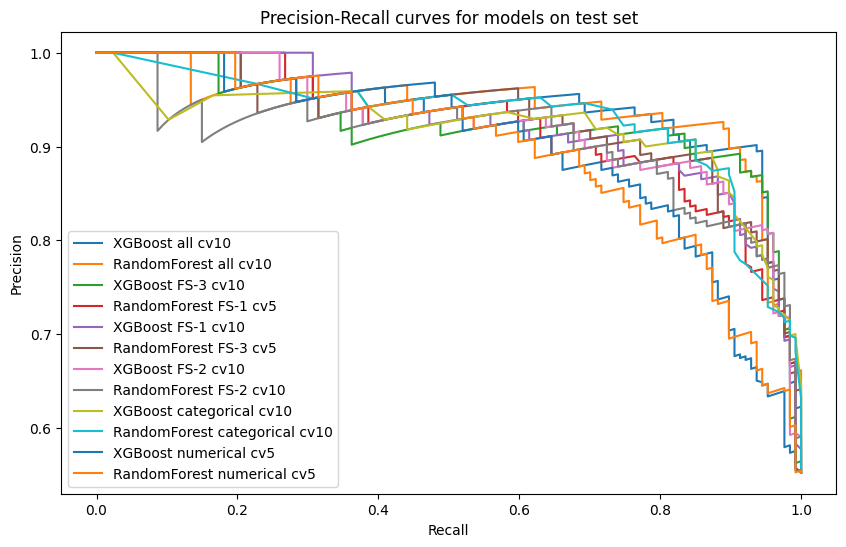

In [127]:
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.plot(recall, precision, label=f"{model_name.split('/')[-1].split('.')[0].replace('_', ' ')}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves for models on test set')
plt.legend()
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.plot(recall, precision, label=f"{model_name.split('/')[-1].split('.')[0].replace('_', ' ')}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves for models on test set')
plt.legend()
plt.savefig(f"{MEDIA_DIR_PATH}04-precision_recall_curves_all.png")
plt.close()

### Precision-Recall curve for best model

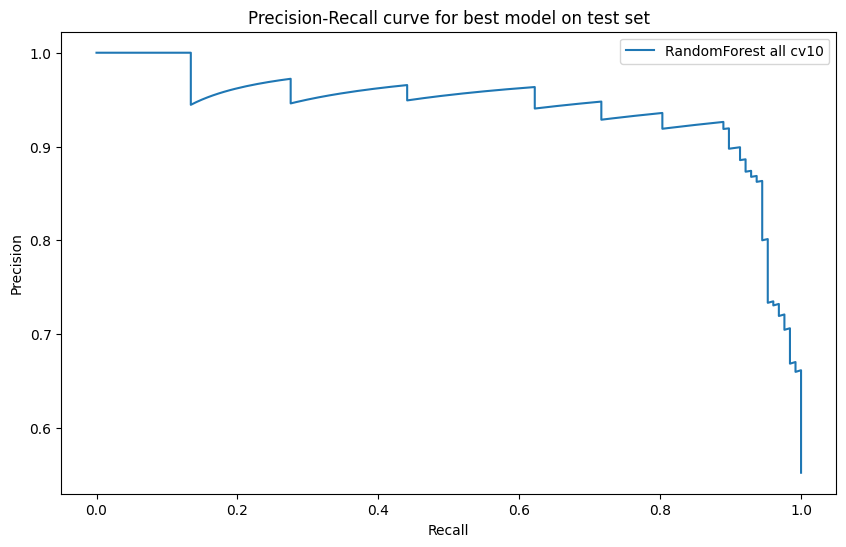

In [128]:
plt.figure(figsize=(10, 6))

for model_name in top_model:
    model = models[f"{MODELS_DIR}{model_name}"]
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.plot(recall, precision, label=f"{model_name.split('.')[0].replace('_', ' ')}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for best model on test set')
plt.legend()
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(10, 6))

for model_name in top_model:
    model = models[f"{MODELS_DIR}{model_name}"]
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.plot(recall, precision, label=f"{model_name.split('.')[0].replace('_', ' ')}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for best model on test set')
plt.legend()
plt.savefig(f"{MEDIA_DIR_PATH}04-precision_recall_curve_best.png")
plt.close()

## Classification report

In [129]:
best_model = models[f"{MODELS_DIR}{top_model[0]}"]

y_pred = best_model.predict(X_test)
print(f"Classification Report: {top_model[0].split('.')[0].replace('_', ' ')}")
print(classification_report(y_test, y_pred))

Classification Report: RandomForest all cv10
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       103
           1       0.89      0.91      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.88      0.89       230
weighted avg       0.89      0.89      0.89       230

